In [14]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import warnings

In [15]:
warnings.filterwarnings("ignore")
image_height, image_width = 64, 64

In [16]:
def load_data(folder_path):
    X = []
    y = []
    for label, subfolder in enumerate(['normal', 'abnormal']):
        subfolder_path = os.path.join(folder_path, subfolder)
        for image_filename in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (image_height, image_width))
            image = image.astype('float32') / 255.0  # Normalize pixel values
            X.append(image)
            y.append(label)
    return np.array(X), np.array(y)

dataset_path = 'dataset'
X, y = load_data(dataset_path)
X
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [18]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [19]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
# Step 6: Train Model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 329ms/step - accuracy: 0.5956 - loss: 0.6843 - val_accuracy: 0.3590 - val_loss: 0.7926
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5877 - loss: 0.6240 - val_accuracy: 0.7949 - val_loss: 0.5692
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.8439 - loss: 0.4885 - val_accuracy: 0.7179 - val_loss: 0.6044
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.9220 - loss: 0.3703 - val_accuracy: 0.6410 - val_loss: 0.6859
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.9428 - loss: 0.2480 - val_accuracy: 0.9231 - val_loss: 0.2599
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.9779 - loss: 0.1932 - val_accuracy: 0.8718 - val_loss: 0.4071
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9545 - loss: 0.0950 - val_accuracy: 0.9487 - val_loss: 0.3183
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9883 - loss: 0.0722 - val_accuracy: 0.9487 - val_loss:

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', test_accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8937 - loss: 0.4109 
Test accuracy: 0.8717948794364929


In [22]:
import cv2
import numpy as np

sample_image = 'abnormal10_1800_2.png'

# Load the image
image = cv2.imread(sample_image)

# Check if the image is loaded successfully
if image is None:
    print(f"Failed to load {sample_image}")
else:
    # Resize the image
    image = cv2.resize(image, (image_height, image_width))

    # Check if the image is resized successfully
    if image is None:
        print(f"Failed to resize {sample_image}")
    else:
        # Normalize pixel values
        image = image.astype('float32') / 255.0  

        # Add batch dimension
        image = np.expand_dims(image, axis=0)  

        # Make prediction
        prediction = model.predict(image)

        # Print prediction
        if prediction[0][0] > 0.5:
            print(sample_image, 'is ABNORMAL')
        else:
            print(sample_image, 'is NORMAL')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
abnormal10_1800_2.png is ABNORMAL


In [23]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

print(classification_report(y_test, y_pred_classes, target_names=['abnormal', 'normal']))
#print(classification_report(y_test, y_pred_classes))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
              precision    recall  f1-score   support

    abnormal       1.00      0.80      0.89        25
      normal       0.74      1.00      0.85        14

    accuracy                           0.87        39
   macro avg       0.87      0.90      0.87        39
weighted avg       0.91      0.87      0.87        39


In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[20  5]
 [ 0 14]]


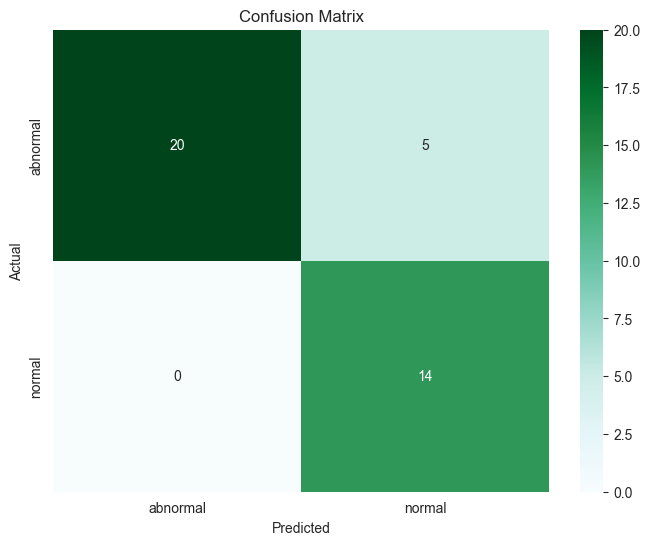

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="BuGn", fmt="d", xticklabels=['abnormal', 'normal'], yticklabels=['abnormal', 'normal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()